# 라이브러리 불러오기

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from supervised.automl import AutoML

# 데이터 불러오기

In [101]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

# 시드 고정

In [102]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(38) # Seed 고정

# data load

In [103]:
x_train = train.drop(columns=['ID', 'monthlyRent(us_dollar)'])
y_train = train['monthlyRent(us_dollar)']
x_test = pd.read_csv('./test.csv').drop(columns=['ID'])

In [105]:
# qualitative column one-hot encoding
qual_col = ['propertyType','suburbName']
ohe = OneHotEncoder(sparse=False)

for i in qual_col:
    x_train = pd.concat([x_train, pd.DataFrame(ohe.fit_transform(x_train[[i]]), columns=ohe.categories_[0])], axis=1)
    
    for qual_value in np.unique(x_test[i]): 
        if qual_value not in np.unique(ohe.categories_): 
            ohe.categories_ = np.append(ohe.categories_, qual_value)
    # One Hot Encoder가 Test 데이터로부터 Fitting되는 것은 Data Leakage이므로, Test 데이터에는 Train 데이터로 Fitting된 One Hot Encoder로부터 transform만 수행되어야 합니다.
    x_test = pd.concat([x_test, pd.DataFrame(ohe.transform(x_test[[i]]), columns=ohe.categories_[0])], axis=1)
    
x_train = x_train.drop(qual_col, axis=1)
x_test = x_test.drop(qual_col, axis=1)
print('Done.')

Done.


In [106]:
# train 데아터와 검증 데이터로 분할
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [107]:
# automl 모델 생성
automl = AutoML(mode = 'Compete', eval_metric='mae')
automl.fit(x_train, y_train)

AutoML directory: AutoML_1
The task is regression with evaluation metric mae
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree mae 87.005346 trained in 1.42 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle
* Step simple_algorithms will try to check up to 4 models
1_DecisionTree mae 85.189415 trained in 4.43 seconds
2_DecisionTree mae 79.942788 trained in 4.28 seconds
3_DecisionTree mae 79.942788 trained in 4.13 seconds
4_Linear m

25_LightGBM_SelectedFeatures_Stacked mae 56.953842 trained in 17.67 seconds
46_RandomForest_Stacked mae 55.96025 trained in 38.52 seconds
61_NeuralNetwork_Stacked mae 158.411108 trained in 27.66 seconds
51_ExtraTrees_Stacked mae 55.554178 trained in 29.06 seconds
35_CatBoost_GoldenFeatures_Stacked not trained. Stop training after the first fold. Time needed to train on the first fold 15.0 seconds. The time estimate for training on all folds is larger than total_time_limit.
* Step ensemble_stacked will try to check up to 1 model
Ensemble_Stacked mae 54.878054 trained in 16.64 seconds
AutoML fit time: 3637.12 seconds
AutoML best model: Ensemble_Stacked


AutoML(eval_metric='mae', mode='Compete')

In [110]:
# 생성된 모델을 test로 예측하기
pred = automl.predict(x_test)
submission['monthlyRent(us_dollar)'] = pred
# 제출파일 생성
submission.to_csv('./result3_20221214.csv', index=False)

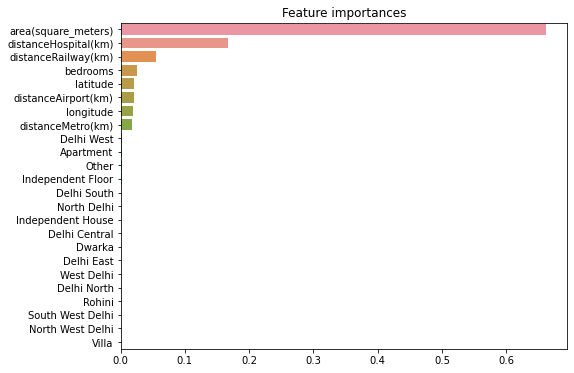

In [89]:
# 변수중요도
importances_values = model.feature_importances_
importances = pd.Series(importances_values, index = x_train.columns)
top20 = importances.sort_values(ascending = False)
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x = top20, y = top20.index)
plt.show()

In [95]:
x_test.latitude

0       28.644199
1       28.724508
2       28.672693
3       28.645021
4       28.607435
          ...    
8688    28.586784
8689    28.646486
8690    28.727852
8691    28.698778
8692    28.526319
Name: latitude, Length: 8693, dtype: float64

In [99]:
x_test.latitude.nunique()

4945